In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("TRAIN2.csv", index_col = 0)
df.head(2)

,cut,color,clarity,depth,table,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
carat,,,,,,,,,,,,
0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353,1,0,6
1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183,0,1,2


In [3]:
# Reparto de datos en train y test
# ==============================================================================
# Lo primero que hacemos es definir cuál es nuestra variable Y y nuestras variables X
X = df.drop(['price', 'cut', 'color', 'clarity'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [4]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())



Datos de entrenamiento
-----------------------
count    32364.000000
mean         7.786349
std          1.018371
min          5.787000
25%          6.851000
50%          7.784000
75%          8.584000
max          9.842000
Name: price, dtype: float64


In [5]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de testeo
-----------------------
count    8091.000000
mean        7.773714
std         1.010634
min         5.814000
25%         6.851500
50%         7.761000
75%         8.572500
max         9.842000
Name: price, dtype: float64


In [6]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: user 7 µs, sys: 3 µs, total: 10 µs
Wall time: 23.1 µs


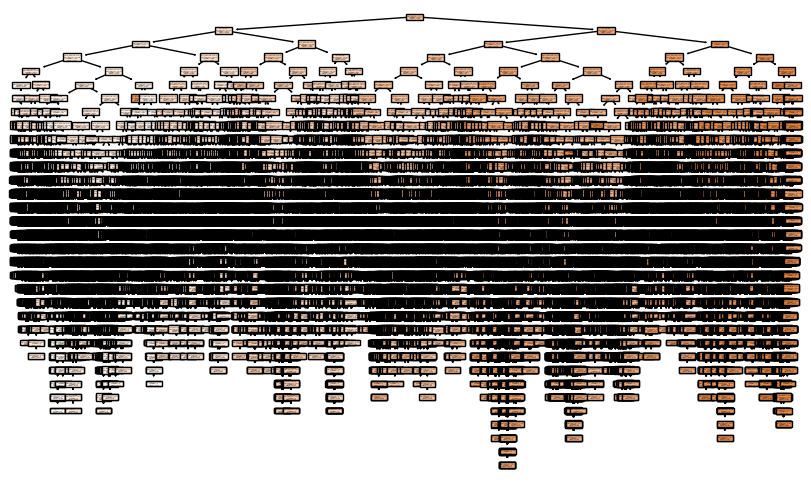

In [7]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

In [8]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

2.8284271247461903

In [9]:
# max depth

print(regressor.tree_.max_depth)

33


In [10]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [11]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [12]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.091003,0.017782,0.133348,0.982588,test,Decission Tree I
1,0.000224,0.000017,0.004178,0.999983,train,Decission Tree I


In [13]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [14]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: user 4 µs, sys: 4 µs, total: 8 µs
Wall time: 28.8 µs
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.074, test=-0.073) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.158, test=-0.161) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.315, test=-0.326) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.251, test=-0.254) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.085, test=-0.088) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.174, test=-0.173) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.304, test=-0.311) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=

[CV 2/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.060, test=-0.059) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.062, test=-0.061) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.062, test=-0.063) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.070, test=-0.070) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.068, test=-0.068) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.067, test=-0.073) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.057, test=-0.058) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.066, test=-0.060) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=3, min_

[CV 3/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.062, test=-0.061) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.056, test=-0.056) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.056, test=-0.056) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.060, test=-0.061) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.063, test=-0.068) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.061, test=-0.061) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.064, test=-0.061) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.063, test=-0.068) total time=   0.0s
[CV 1/10] END max_depth=4, max_features

[CV 8/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.050, test=-0.050) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.080, test=-0.083) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.067, test=-0.070) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.179, test=-0.173) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.068, test=-0.068) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.058, test=-0.058) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.218, test=-0.230) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.084, test=-0.082) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=2, min_

[CV 1/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.049, test=-0.049) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.047, test=-0.048) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.045, test=-0.045) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.046, test=-0.046) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.044, test=-0.045) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.045, test=-0.044) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.047, test=-0.051) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.044, test=-0.045) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=

[CV 4/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.090, test=-0.095) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.087, test=-0.096) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.112, test=-0.112) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.151, test=-0.153) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.070, test=-0.073) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.098, test=-0.095) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.099, test=-0.108) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.141, test=-0.142) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=1, min

[CV 2/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.036, test=-0.041) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.033, test=-0.034) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.033, test=-0.036) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.035, test=-0.036) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.045, test=-0.044) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.040, test=-0.046) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.035, test=-0.036) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.035, test=-0.036) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=4, min_

[CV 5/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.033, test=-0.033) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.032, test=-0.033) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.033, test=-0.037) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.031, test=-0.032) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.032, test=-0.034) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.032, test=-0.035) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.034, test=-0.034) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.032, test=-0.034) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=6, mi

[CV 4/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.037, test=-0.036) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.053, test=-0.052) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.109, test=-0.109) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.043, test=-0.049) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.051, test=-0.052) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.045, test=-0.047) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.040, test=-0.050) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.037, test=-0.039) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=

[CV 5/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.025, test=-0.027) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.026, test=-0.026) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.026, test=-0.029) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.027, test=-0.029) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.027, test=-0.027) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.028, test=-0.034) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.028, test=-0.030) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.028, test=-0.029) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=5, min_

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [15]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree


DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=10)

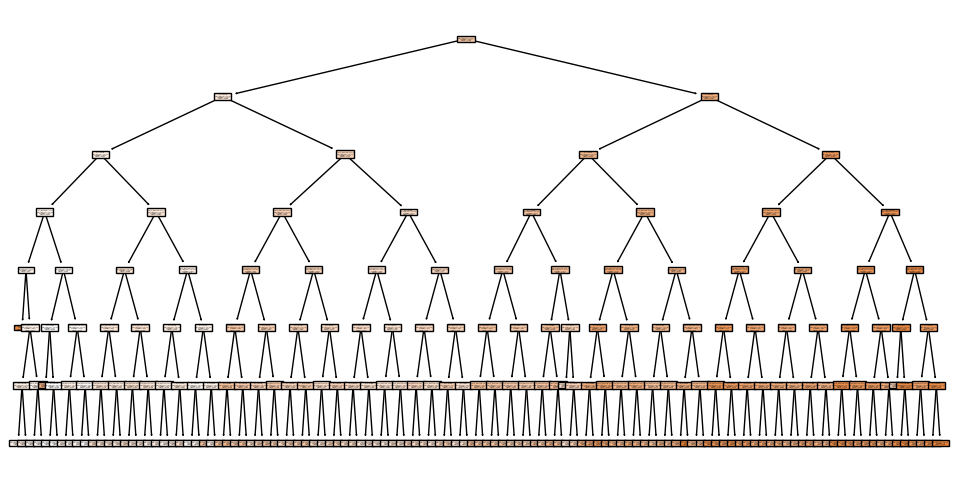

In [16]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);



In [17]:
 #guardamos la imagen 

fig.savefig("decision_tree.png", facecolor="white")

In [18]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- y <= 5.61
|   |--- y <= 4.97
|   |   |--- x <= 4.61
|   |   |   |--- cut_encoded <= 1.50
|   |   |   |   |--- x <= 1.87
|   |   |   |   |   |--- value: [9.64]
|   |   |   |   |--- x >  1.87
|   |   |   |   |   |--- clarity_encoded <= 2.50
|   |   |   |   |   |   |--- x <= 4.31
|   |   |   |   |   |   |   |--- value: [6.54]
|   |   |   |   |   |   |--- x >  4.31
|   |   |   |   |   |   |   |--- value: [6.77]
|   |   |   |   |   |--- clarity_encoded >  2.50
|   |   |   |   |   |   |--- clarity_encoded <= 4.50
|   |   |   |   |   |   |   |--- value: [6.54]
|   |   |   |   |   |   |--- clarity_encoded >  4.50
|   |   |   |   |   |   |   |--- value: [6.34]
|   |   |   |--- cut_encoded >  1.50
|   |   |   |   |--- x <= 4.27
|   |   |   |   |   |--- z <= 1.15
|   |   |   |   |   |   |--- value: [8.54]
|   |   |   |   |   |--- z >  1.15
|   |   |   |   |   |   |--- x <= 4.03
|   |   |   |   |   |   |   |--- value: [6.16]
|   |   |   |   |   |   |--- x >  4.03
|   |   |   |   |   |   |   |

In [19]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)


In [20]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [21]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.127450,0.028110,0.167659,0.972475,test,Decision tree II
1,0.124304,0.026202,0.161870,0.974734,train,Decision tree II


# prueba predicciones 

In [23]:
df = pd.read_csv("realidad2.csv", index_col = 0)
X_realida = df.drop(['cut', 'color', 'clarity'], axis=1)


In [24]:
X_realida_submision = best_tree.predict(X_realida)
X_realida_submision

array([6.34217672, 8.51849819, 9.38000949, ..., 6.53940539, 8.5385576 ,
       8.01790287])

In [25]:
submision1 = pd.DataFrame(X_realida_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

,id,price
0,0,6.342177
1,1,8.518498
2,2,9.380009
3,3,7.777680
4,4,8.952734
...,...,...
13480,13480,8.518498
13481,13481,8.298558
13482,13482,6.539405
13483,13483,8.538558


In [26]:
submision1.to_csv("valen2.csv", index=False)